# Phase-I Pixel detector: Efficiency measurements using the first collisions

The purpose of this notebook and presentation is to provide documentation and validation of the efficiency measurements.

<div style="margin-top: 20px; display: inline-block;"><a href="mailto:adam.hunyadi@cern.ch?Subject=Phase-I%20Pixel detector:%20Efficiency%20Measurements" target="_top">adam.hunyadi@cern.ch</div>
<div style="margin-left: 30px; margin-right: 30px; display: inline;">- - -</div>
<div style="display: inline;">2017. 05. 17.</div>

## Tools used
The PhaseIPixelNtuplizer package (used to process the CMSSW output) is available at:

https://github.com/jkarancs/PhaseIPixelNtuplizer

The PhaseIEfficiencyPlotter package (used to create plots) is available at:

https://github.com/hunyadix/PhaseIEfficiencyPlotter

In [1]:
import ROOT, sys
ROOT.gStyle.SetPalette(1)
sys.path.append('../python/')
inputFile = ROOT.TFile.Open("/data_ssd_120gb/hunyadi/CMSSW/PhaseIEfficiencyPlotter_2017_04_02/CMSSW_9_1_0_pre3/src/DPGAnalysis/PhaseIEfficiencyPlotter/histograms_test.root", "READ")

In [2]:
DELAY_PLOTS_NUM_BINS   = 20 * 25;
DELAY_PLOTS_LOWER_EDGE = 153;
DELAY_PLOTS_UPPER_EDGE = 173;
labelsWBC = []
for wbcSetting in range(DELAY_PLOTS_LOWER_EDGE, DELAY_PLOTS_UPPER_EDGE):
    for nanosec in [nanosecLabel * 5 for nanosecLabel in range(0, 5)]:
        labelsWBC += ["WBC" + str(wbcSetting) + ":++" + str(nanosec) + "ns"]

## Validation - List of delay scenarios
The Ntuple should contain plots listed in different directories. Each of these directories should correspont to a delay scenario. This code prints out the delay scenarios:


In [3]:
for key in ROOT.gDirectory.GetListOfKeys():
    print key.GetTitle()

Delay_4000.00
Delay_4125.00
Delay_4075.00
Delay_3925.00
Delay_4025.00
Cluster_size_X_vs_delay
Cluster_size_Y_vs_delay
Efficiency_vs_delay


The delay scenarios should have been printed out ("Delay -9999.00" is saved for unknown delay scenarios or simulations). 

In [4]:
mainDir = ROOT.gDirectory.Get("Efficiency_vs_delay/Graphs")
for index, directory in enumerate(mainDir.GetListOfKeys()): 
    sys.stdout.write("[ %s ] " % directory.GetTitle())

[ BpixFpix ] [ LayersNegativePositive ] [ DisksInnerOuter ] [ LayerDetailed ] 

## Validation - Plots

### Efficiency vs delay on the barrel and forward regions

In [5]:
canvas = ROOT.TCanvas("FpixBpixCanvas")
graph = ROOT.TMultiGraph("FpixBpix", "Efficiency vs delay on FPix, BPix;delay(WBC setting + ns);efficiency")
graph.Add(mainDir.Get("BpixFpix").Get("delayVsEfficiencyBPixAsGraph"))
graph.Add(mainDir.Get("BpixFpix").Get("delayVsEfficiencyFPixAsGraph"))
canvas.SetBottomMargin(0.2)
graph.Draw("0AP")
graph.GetXaxis().SetLabelOffset(0.05)
graph.GetXaxis().CenterTitle()
graph.GetXaxis().SetTitleOffset(3.1)
for numBin in range(len(labelsWBC)):
    graph.GetXaxis().ChangeLabel(numBin + 1, 60, 0.018, -1, -1, -1, labelsWBC[numBin])
canvas.BuildLegend(0.6, 0.55, 0.85, 0.75, "", "P")

<ROOT.TLegend object ("TPave") at 0x6495e90>

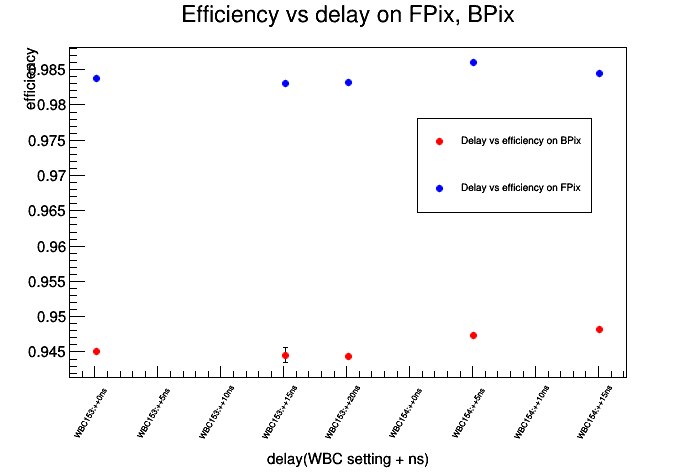

In [6]:
canvas.Draw()

<center><h2> Efficiency vs delay on the barrel - sides of layers</h2></center>

In [7]:
canvases = [None] * 2
graphs   = [None] * 2
canvases[0] = ROOT.TCanvas("LayersNegativeCanvas")
canvases[1] = ROOT.TCanvas("LayersPositiveCanvas")
graphs[0] = ROOT.TMultiGraph("LayersNegative", 
    "Efficiency vs delay on layers - negative side;delay(WBC setting + ns);efficiency")
graphs[1] = ROOT.TMultiGraph("LayersPositive", 
    "Efficiency vs delay on layers - positive side;delay(WBC setting + ns);efficiency")
graphs[0].Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer1NegativeAsGraph"))
graphs[0].Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer2NegativeAsGraph"))
graphs[0].Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer3NegativeAsGraph"))
graphs[0].Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer4NegativeAsGraph"))
graphs[1].Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer1PositiveAsGraph"))
graphs[1].Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer2PositiveAsGraph"))
graphs[1].Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer3PositiveAsGraph"))
graphs[1].Add(mainDir.Get("LayersNegativePositive").Get("delayVsEfficiencyLayer4PositiveAsGraph"))
for graphIndex in range(len(graphs)):
    canvases[graphIndex].cd()
    canvases[graphIndex].SetBottomMargin(0.2)
    graphs[graphIndex].Draw("0AP")
    graphs[graphIndex].GetXaxis().SetLabelOffset(0.05)
    graphs[graphIndex].GetXaxis().CenterTitle()
    graphs[graphIndex].GetXaxis().SetTitleOffset(3.1)
    for numBin in range(len(labelsWBC)):
        graphs[graphIndex].GetXaxis().ChangeLabel(numBin + 1, 60, 0.018, -1, -1, -1, labelsWBC[numBin])
    canvases[graphIndex].BuildLegend(0.45, 0.45, 0.88, 0.70, "", "P")

<center><strong>[Use the up and down keys to navigate between plots.]</strong></center>

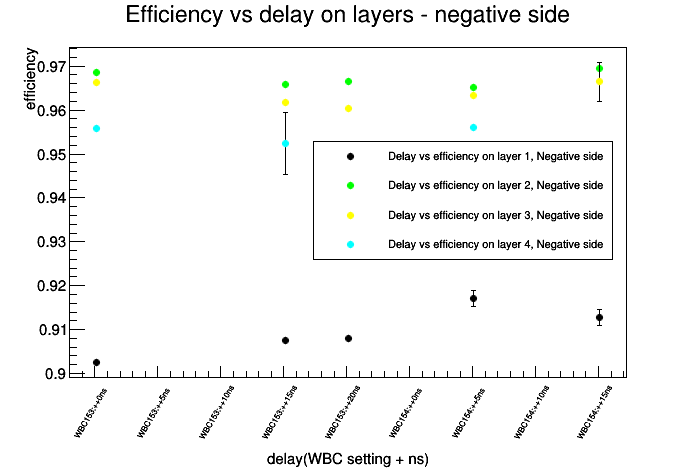

In [8]:
canvases[0].Draw()

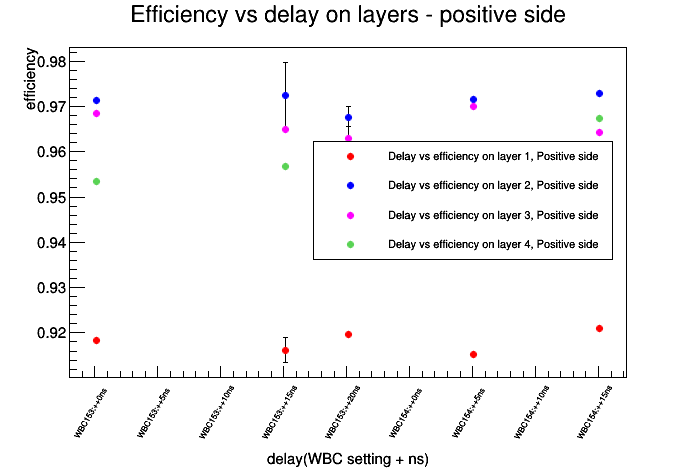

In [9]:
canvases[1].Draw()

<center><h2> Efficiency vs delay on the disks - inner and outer rings on  both endcaps</h2></center>

In [10]:
canvases = [None] * 4
graphs   = [None] * 4
canvases[0] = ROOT.TCanvas("InnerRingsNegativeCanvas")
canvases[1] = ROOT.TCanvas("OuterRingsNegativeCanvas")
canvases[2] = ROOT.TCanvas("InnerRingsPositiveCanvas")
canvases[3] = ROOT.TCanvas("OuterRingsPositiveCanvas")
graphs[0] = ROOT.TMultiGraph("InnerRingsNegative", 
    "Efficiency vs delay on inner rings - negative side;delay(WBC setting + ns);efficiency")
graphs[1] = ROOT.TMultiGraph("OuterRingsNegative", 
    "Efficiency vs delay on outer rings - negative side;delay(WBC setting + ns);efficiency")
graphs[2] = ROOT.TMultiGraph("InnerRingsPositive", 
    "Efficiency vs delay on inner rings - positive side;delay(WBC setting + ns);efficiency")
graphs[3] = ROOT.TMultiGraph("OuterRingsPositive", 
    "Efficiency vs delay on outer rings - positive side;delay(WBC setting + ns);efficiency")
mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1NegativeSideInnerRingAsGraph").SetFillStyle(4)
mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1NegativeSideInnerRingAsGraph").SetFillColor(4)
graphs[0].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1NegativeSideInnerRingAsGraph"))
graphs[0].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk2NegativeSideInnerRingAsGraph"))
graphs[0].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk3NegativeSideInnerRingAsGraph"))
graphs[1].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1NegativeSideOuterRingAsGraph"))
graphs[1].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk2NegativeSideOuterRingAsGraph"))
graphs[1].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk3NegativeSideOuterRingAsGraph"))
graphs[2].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1PositiveSideInnerRingAsGraph"))
graphs[2].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk2PositiveSideInnerRingAsGraph"))
graphs[2].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk3PositiveSideInnerRingAsGraph"))
graphs[3].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk1PositiveSideOuterRingAsGraph"))
graphs[3].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk2PositiveSideOuterRingAsGraph"))
graphs[3].Add(mainDir.Get("DisksInnerOuter").Get("delayVsEfficiencyDisk3PositiveSideOuterRingAsGraph"))
for graphIndex in range(len(graphs)):
    canvases[graphIndex].cd()
    canvases[graphIndex].SetBottomMargin(0.2)
    graphs[graphIndex].Draw("0AP")
    graphs[graphIndex].GetXaxis().SetLabelOffset(0.05)
    graphs[graphIndex].GetXaxis().CenterTitle()
    graphs[graphIndex].GetXaxis().SetTitleOffset(3.1)
    for numBin in range(len(labelsWBC)):
        graphs[graphIndex].GetXaxis().ChangeLabel(numBin + 1, 60, 0.018, -1, -1, -1, labelsWBC[numBin])
    canvases[graphIndex].BuildLegend(0.45, 0.68, 0.88, 0.88, "", "P")

<center><strong>[Use the up and down keys to navigate between plots.]</strong></center>

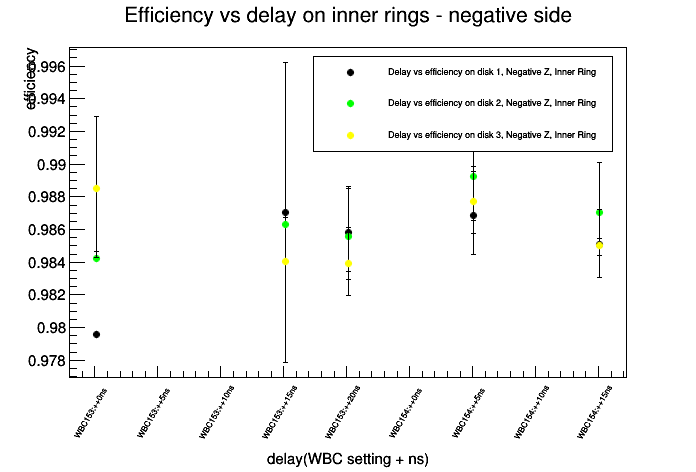

In [11]:
canvases[0].Draw()

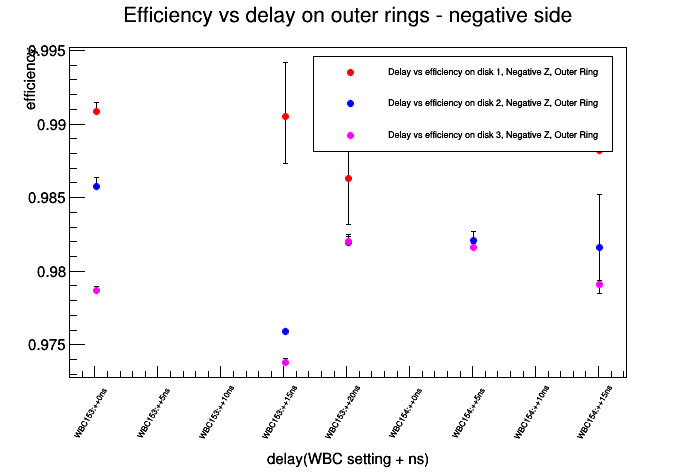

In [12]:
canvases[1].Draw()

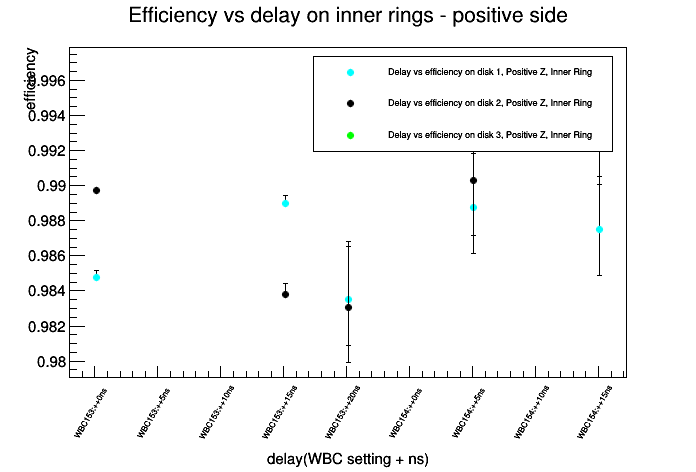

In [13]:
canvases[2].Draw()

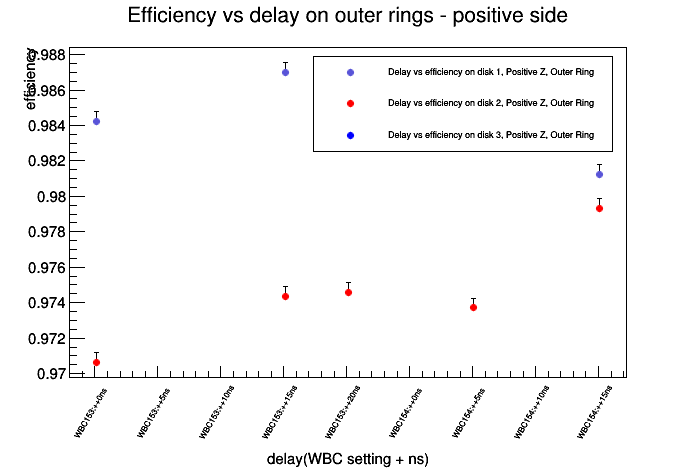

In [14]:
canvases[3].Draw()

## Efficiency vs delay on the barrel - sectors of half shells on both sides

In [15]:
canvases              = [None] * 8
graphs                = [None] * 8
sideStrings           = ["Negative", "Positive"]
layerPairStrings      = ["1 and 2", "3 and 4"]
layerPairStringsShort = ["1and2", "3and4"]
for index in range(64):
    side                   = index / 32
    halfShell              = (index - side * 32) / 16
    layerPair              = (index - side * 32 - halfShell * 16) / 8
    sec                    = index % 8
    sideAsString           = sideStrings[side - 1]
    secAsString            = str(sec + 1)
    halfShellAsString      = sideStrings[halfShell - 1]
    layerPairAsString      = layerPairStrings[layerPair - 1]
    layerPairAsShortString = layerPairStringsShort[layerPair - 1]
    graphIndex             = side * 4 + halfShell * 2 + layerPair
    if sec == 0: 
        canvases[graphIndex] = ROOT.TCanvas(sideAsString.lower() + "Z" + halfShellAsString + "XShellLayers" + layerPairAsShortString + "canvas")
        graphs[graphIndex]   = ROOT.TMultiGraph(sideAsString.lower() + "Z" + halfShellAsString + "Layers" + layerPairAsShortString, 
            "Efficiency vs delay on sectors - " + sideAsString.lower() + " Z, " + halfShellAsString.lower() + " X shell, layers " + layerPairAsString + ";delay(WBC setting + ns);efficiency")
    graphs[graphIndex].Add(mainDir.Get("LayerDetailed").Get("delayVsEfficiency" + sideAsString + "Z" + halfShellAsString + "XShellSector" + secAsString + "Layers" + layerPairAsShortString + "AsGraph"))
for graphIndex in range(len(graphs)):
    canvases[graphIndex].cd()
    canvases[graphIndex].SetBottomMargin(0.2)
    graphs[graphIndex].Draw("0AP")
    graphs[graphIndex].GetXaxis().SetLabelOffset(0.05)
    graphs[graphIndex].GetXaxis().CenterTitle()
    graphs[graphIndex].GetXaxis().SetTitleOffset(3.1)
    for numBin in range(len(labelsWBC)):
        graphs[graphIndex].GetXaxis().ChangeLabel(numBin + 1, 60, 0.018, -1, -1, -1, labelsWBC[numBin])
    canvases[graphIndex].BuildLegend(0.42, 0.48, 0.88, 0.88, "", "P")

<center><strong>[Use the up and down keys to navigate between plots.]</strong></center>

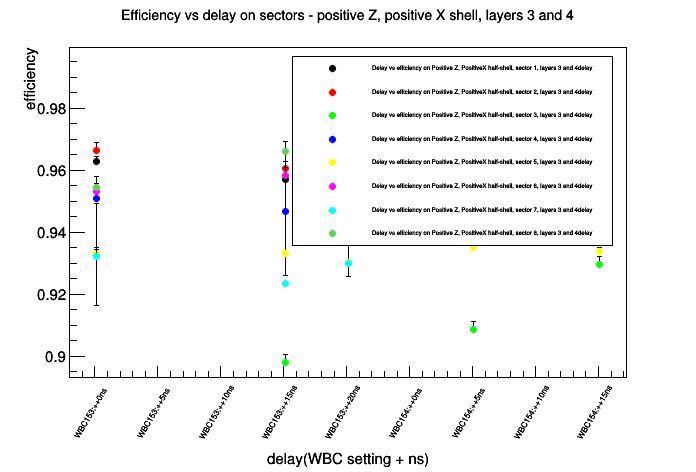

In [16]:
canvases[0].Draw()

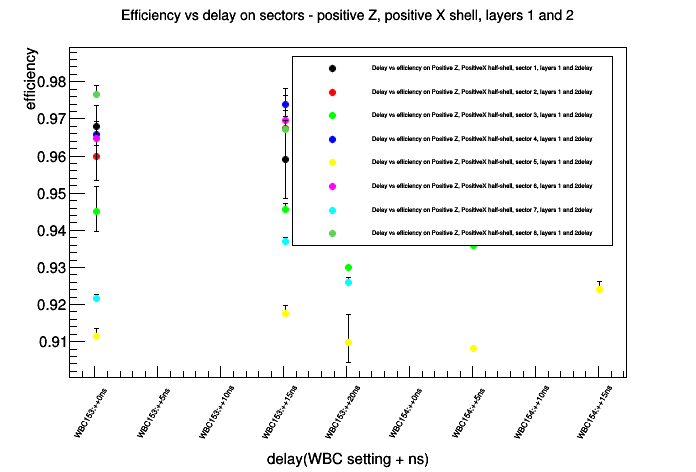

In [17]:
canvases[1].Draw()

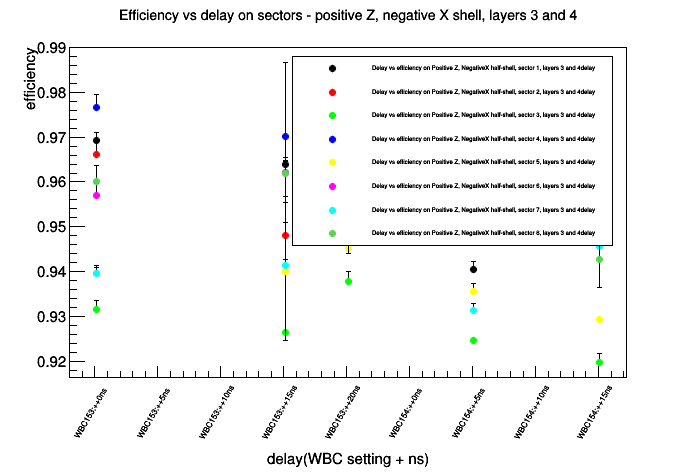

In [18]:
canvases[2].Draw()

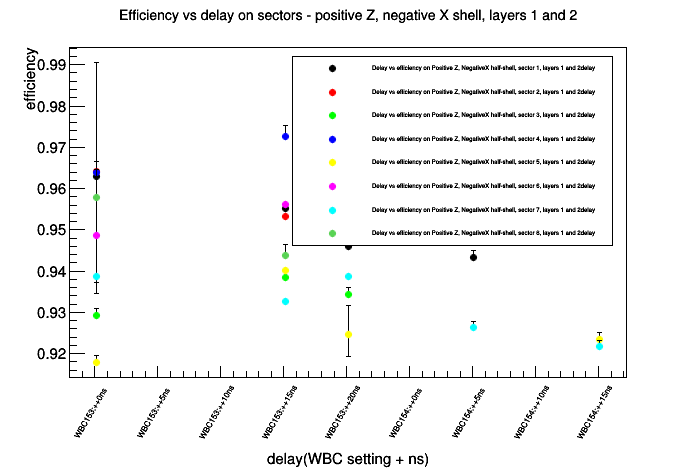

In [19]:
canvases[3].Draw()

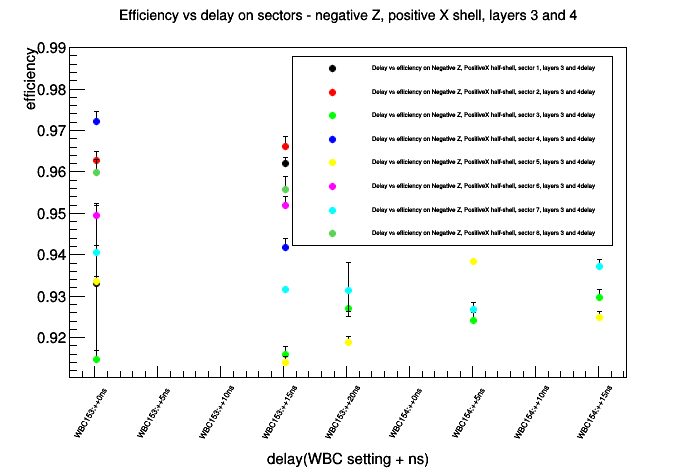

In [20]:
canvases[4].Draw()

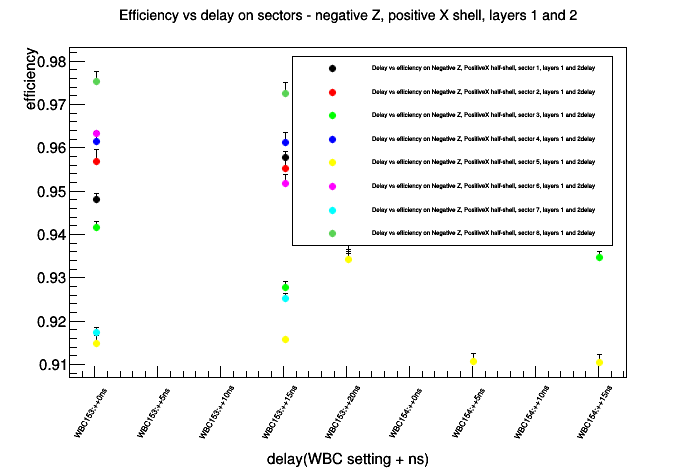

In [21]:
canvases[5].Draw()

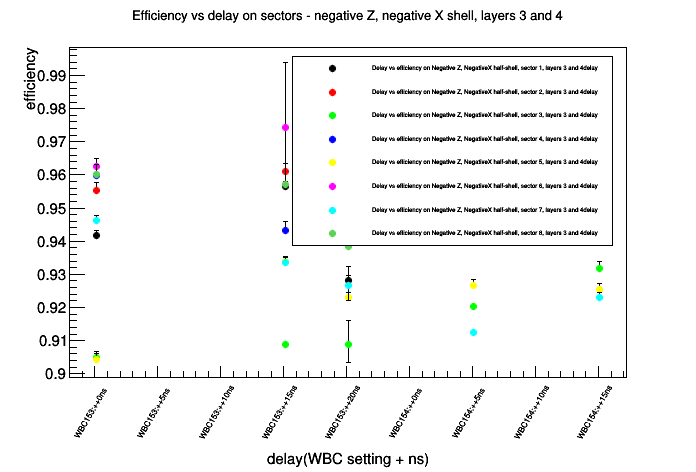

In [22]:
canvases[6].Draw()

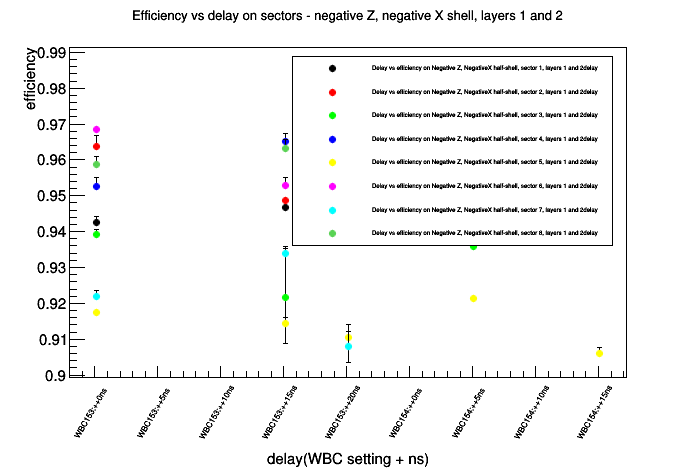

In [23]:
canvases[7].Draw()